In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
RELEASE_FAMILIES_FILENAME = 'release_families.json'

In [7]:
with open(RELEASE_FAMILIES_FILENAME) as f:
    release_family_data = json.load(f)

In [11]:
unique_update_desc = set()
unique_update_freqs = {}

total_num_updates = 0

for release_family in release_family_data:
    for update in release_family['updates']:
        update_name = update['update_name']
        update_desc = update['update_desc']

        if update_desc not in unique_update_desc:
            # unique update
            if update_name in unique_update_freqs:
                unique_update_freqs[update_name] += 1
            else:
                unique_update_freqs[update_name] = 1

            unique_update_desc.add(update_desc)

        total_num_updates += 1
unique_update_freqs

{'Alternative Routes While Driving': 1,
 'Apple Podcasts': 1,
 'Automatic 911 Calls': 1,
 'Automatic Blind Spot Camera': 1,
 'Autopilot Suspension': 1,
 'Cabin Camera': 14,
 'Castle Doombad Game': 1,
 'Custom Lock Sounds': 1,
 'Destination Charging Availability': 1,
 'Detailed Energy Usage': 1,
 'Driving Visualization Improvements': 8,
 'Extras': 14,
 'Fold Mirrors at a Location': 1,
 'FSD Beta v11.4.9': 1,
 'FSD Beta v12.1': 1,
 'FSD Beta v12.1.1': 1,
 'FSD Beta v12.1.2': 1,
 'Full Self-Driving (Beta)': 12,
 'Light Show': 2,
 'Live Camera Access': 1,
 'Minor Fixes': 31,
 'Minor Updates': 1,
 'More Cameras in Live Camera View': 1,
 'Over-the-Air (OTA) Recall': 2,
 'Park Assist Upgrade': 1,
 'Play Games on Rear Screen': 1,
 'Rear Passenger Headphones': 2,
 'Single Pull to Start Autopilot': 3,
 'Speed Assist': 7,
 'Speed Cameras on Your Route': 1,
 'Steering Improvements': 1,
 'Tesla Arcade Updates': 1,
 'Trip Planner on Mobile App': 1,
 'Zoom Video Meetings': 1,
 'Adaptive High Beams': 

In [12]:
print('Total Number of Updates: ', total_num_updates)
print('Total Number of Unique Updates: ', len(unique_update_desc))
print('Number of unique update names: ', len(unique_update_freqs))

Total Number of Updates:  996
Total Number of Unique Updates:  818
Number of unique update names:  462


In [6]:
with open('unique_update_freqs.json', 'w') as f:
    f.write(json.dumps(unique_update_freqs))

In [7]:
unique_update_freqs_df = pd.DataFrame(list(unique_update_freqs.items()), columns=['Update Names', 'Occurrence'])
unique_update_freqs_df

,Update Names,Occurrence
0,Alternative Routes While Driving,1
1,Apple Podcasts,1
2,Automatic 911 Calls,1
3,Automatic Blind Spot Camera,1
4,Autopilot Suspension,1
...,...,...
457,Version 9.0,3
458,Viewing Applications with Media Player Open,1
459,Media,1
460,Traffic View,1


In [13]:
unique_update_freqs_tagged_df = pd.read_csv('unique_update_freqs_tagged.csv')
unique_update_freqs_tagged_df = unique_update_freqs_tagged_df.drop('Occurrence', axis=1)
unique_update_freqs_tagged_df

,Update Names,Type,Further Tags
0,Additional Information,User Information,NaN
1,Additional Vehicle Information,User Information,NaN
2,Get to Know Your Tesla,User Information,NaN
3,In App Release notes,User Information,NaN
4,New Legal Notice,User Information,NaN
...,...,...,...
457,Subwoofer,Comfort,NaN
458,Tesla Profiles,Comfort,NaN
459,Vehicle Sync (Beta),Comfort,Effects Security
460,Warmer Display Colors,Comfort,NaN


In [3]:
unique_update_freqs_tagged_df = pd.read_csv('unique_update_freqs_tagged.csv')

type_counts = {}
total_counts = 0
for _, row in unique_update_freqs_tagged_df.iterrows():
    update_type = row['Type']

    if update_type in type_counts:
        type_counts[update_type] += row['Occurrence']
    else:
        type_counts[update_type] = row['Occurrence']
    total_counts += row['Occurrence']
    
type_counts

{'User Information': 19,
 'Major Effects to Safety': 76,
 'Unknown': 8,
 'Self Driving': 140,
 'Safety Feature': 20,
 'Not Affecting Safety': 289,
 'Minor Fix': 72,
 'Minor Effects to Safety': 99,
 'Map Software': 41,
 'Map Data': 3,
 'Fuel and Battery': 43,
 'Diagnostics': 8}

In [4]:
print('Total number of unique update: ', total_counts)

Total number of unique update:  818


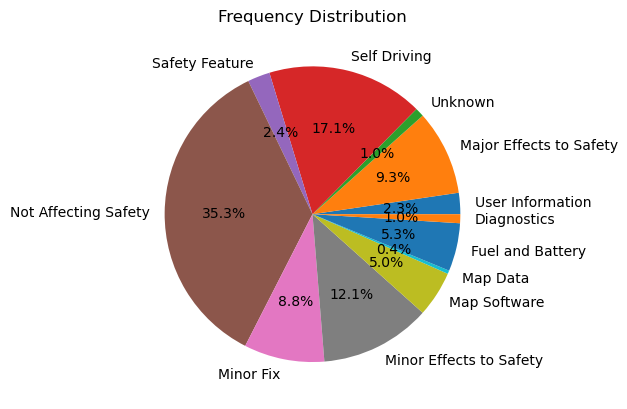

In [5]:
# Extract labels and values from the dictionary
labels = type_counts.keys()
values = type_counts.values()

# Create the pie chart
plt.pie(values, labels=labels, autopct="%1.1f%%")

# Add a title
plt.title("Frequency Distribution")

# Display the chart
plt.show()

In [6]:
def get_update_desc(update_name: str) -> str:
    update_descriptions = ''
    unique_update_desc = set()

    for release_family in release_family_data:
        for update in release_family['updates']:
            if update_name == update['update_name']:
                update_desc = update['update_desc']

                if update_desc not in unique_update_desc:
                    unique_update_desc.add(update_desc)

                    update_descriptions += update_desc
                    update_descriptions += '\n'
                    update_descriptions += '\n'

    return update_descriptions

In [17]:
# Add the descriptions to each of the rows
for i, row in unique_update_freqs_tagged_df.iterrows():
    update_name = row['Update Names']
    # print(update_name)

    update_descriptions = get_update_desc(update_name)
    # print(update_descriptions)

    unique_update_freqs_tagged_df.at[i, 'Description'] = update_descriptions

In [16]:
unique_update_freqs_tagged_df

,Description,Update Names,Occurrence,Type,Further Tags
0,Additional InformationAdditonal details are no...,Additional Information,1,User Information,NaN
1,Additional Vehicle InformationView additional ...,Additional Vehicle Information,1,User Information,NaN
2,Get to Know Your TeslaNew FeatureLearn basics ...,Get to Know Your Tesla,2,User Information,NaN
3,In App Release notesFrom car version 2022.40 a...,In App Release notes,1,User Information,NaN
4,New Legal NoticeAs a potential sign that Tesla...,New Legal Notice,1,User Information,NaN
...,...,...,...,...,...
457,SubwooferYou can now adjust your subwoofer by ...,Subwoofer,1,Not Affecting Safety,Comfort
458,Tesla ProfilesKeep your settings and preferenc...,Tesla Profiles,1,Not Affecting Safety,Comfort
459,Vehicle Sync (Beta)Driver Profile settings suc...,Vehicle Sync (Beta),1,Not Affecting Safety,Comfort Security
460,Warmer Display Colors Set your touchscreen to ...,Warmer Display Colors,2,Not Affecting Safety,Comfort


In [19]:
unique_update_freqs_tagged_df.to_csv('unique_update_freqs_tagged.csv', index=False)